In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gai shi dao wang,1969


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [35]:
a=cast[(cast.character=="Superman") | (cast.character=="Batman")].groupby(["year","character"]).size().unstack()
a[a.Superman-a.Batman>0]

character,Batman,Superman
year,,
1973,1.0,2.0


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [36]:
a=cast[(cast.character=="Superman") | (cast.character=="Batman")].groupby(["year","character"]).size().unstack()
a[a.Superman-a.Batman<0]

character,Batman,Superman
year,,
2008,3.0,2.0
2009,3.0,1.0
2010,3.0,1.0
2011,4.0,2.0
2012,2.0,1.0
2013,5.0,1.0
2014,5.0,1.0
2015,4.0,1.0
2016,12.0,4.0


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

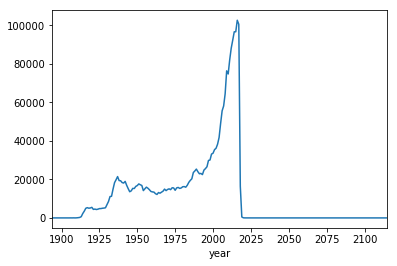

In [18]:
a=cast.groupby(["year","type"]).size().unstack()
(a.actor).plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

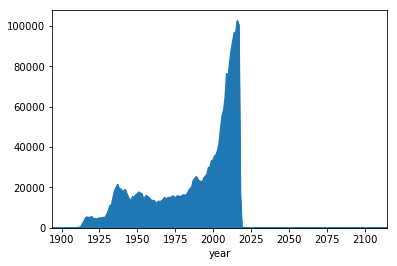

In [17]:
a=cast.groupby(["year","type"]).size().unstack()
(a.actor).plot(kind="area")

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

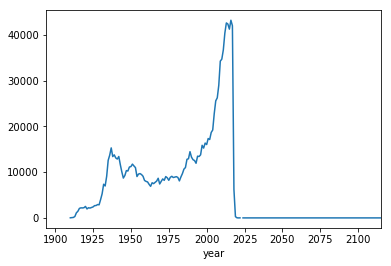

In [19]:
a=cast.groupby(["year","type"]).size().unstack()
(a.actor-a.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

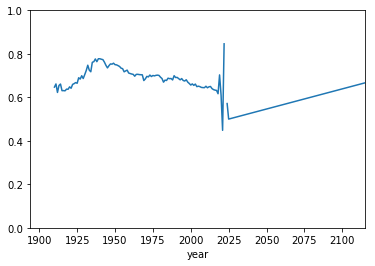

In [15]:
a=cast.groupby(["year","type"]).size().unstack()
(a.actor/(a.actor+a.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [ ]:
a=cast.groupby(["year","type"]).size().unstack()
(a.actor).plot(kind="area")

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

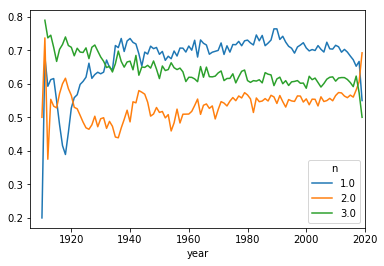

In [27]:
a=cast[cast.n<=3].groupby(["year","type","n"]).size().unstack("type")
(a.actor/(a.actor+a.actress)).unstack().plot()